In [1]:
noaanum = 12673
obsdate = "20170906_000000"

# ISEE / Kusano
nc_file = f"/mnt/obsdata/isee_nlfff_v1.2/{noaanum}/{noaanum}_{obsdate}.nc"

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from tool.load_nlfff import nlfff

In [3]:
data = nlfff(nc_file)

x (westward)  unit: Mm
y (northward)  unit: Mm
z (out ot photosphere)  unit: Mm
Bx (westward)  unit: G
By (northward)  unit: G
Bz (out of photosphere)  unit: G
Bx_pot (westward)  unit: G
By_pot (northward)  unit: G
Bz_pot (out of photosphere)  unit: G


In [4]:
x = data.x 
y = data.y 
z = data.z 

x.shape, y.shape, z.shape

((513,), (257,), (257,))

In [58]:
dx = np.diff(x)[0]
dy = np.diff(y)[0]
dz = np.diff(z)[0]

In [6]:
Bx = data.bx 
By = data.by 
Bz = data.bz 

B = np.stack([Bx, By, Bz], axis=-1)
B.shape

(513, 257, 257, 3)

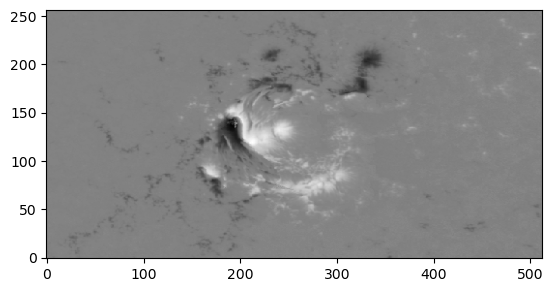

In [17]:
plt.imshow(B[:, :, 0, 2].T, origin='lower', cmap='gray')

$$
\vec{B} = B_x\hat{x} + B_y\hat{y} + B_z\hat{z}
$$
```
B.shape = (nx, ny, nz, 3)

Bx = B[:, :, :, 0]
By = B[:, :, :, 1]
Bz = B[:, :, :, 2]
```

$$
|\vec{B}| = \sqrt{B_x^2 + B_y^2 + B_z^2}
$$

```
b_norm.shape = (nx, ny, nz)
```

In [22]:
bb_norm = np.sqrt((B**2).sum(-1))
bb_norm.shape

(513, 257, 257)

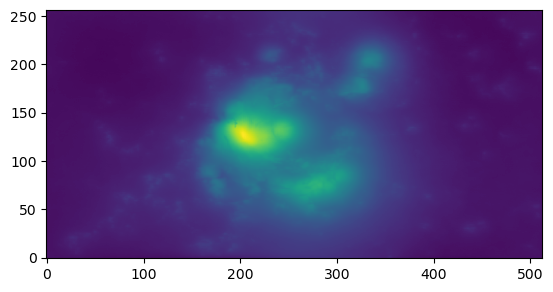

In [23]:
plt.imshow(bb_norm.sum(-1).T, origin='lower')

In [16]:
b_norm = np.linalg.norm(B, axis=-1)
b_norm.shape

(513, 257, 257)

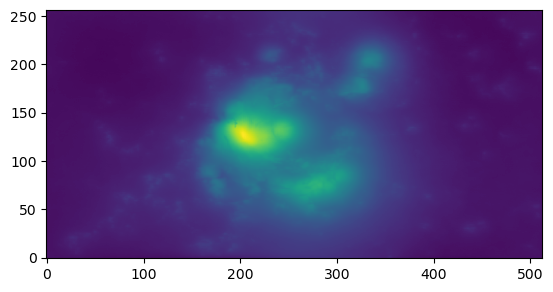

In [21]:
plt.imshow(b_norm.sum(-1).T, origin='lower')

In [24]:
np.allclose(bb_norm, b_norm)

True

$$
f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}
$$

$$
f''(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}
$$

$$
\nabla \times \mathbf{F} =
\left(\frac{\partial F_z}{\partial y} - \frac{\partial F_y}{\partial z}\right) \boldsymbol{\hat x} + \left(\frac{\partial F_x}{\partial z} - \frac{\partial F_z}{\partial x} \right) \boldsymbol{\hat y} + \left(\frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} \right) \boldsymbol{\hat z}
$$

$$
\nabla\cdot\mathbf{F} = \frac{\partial F_x}{\partial x}+\frac{\partial F_y}{\partial y}+\frac{\partial F_z}{\partial z}.
$$

$$
\nabla^2 \mathbf{F} = (\nabla^2 F_x, \nabla^2 F_y, \nabla^2 F_z)
$$

$$
\nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2} + \frac{\partial^2 f}{\partial z^2}
$$

In [33]:
B = np.array(B)
Bx = B[..., 0]
By = B[..., 1]
Bz = B[..., 2]

In [34]:
Bx_dx = Bx[1:, :, :] - Bx[:-1, :, :]
Bx_dx.shape

(512, 257, 257)

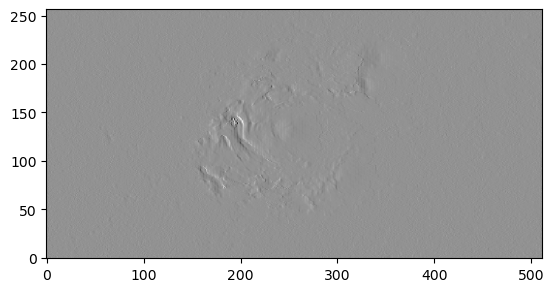

In [41]:
plt.imshow(Bx_dx[:, :, 0].T, origin='lower', cmap='gray')

In [59]:
dBx_dx, dBx_dy, dBx_dz = np.gradient(Bx, dx, dy, dz, axis=[0, 1, 2], edge_order=2)
dBy_dx, dBy_dy, dBy_dz = np.gradient(By, dx, dy, dz, axis=[0, 1, 2], edge_order=2)
dBz_dx, dBz_dy, dBz_dz = np.gradient(Bz, dx, dy, dz, axis=[0, 1, 2], edge_order=2)

In [60]:
J = np.stack([dBz_dy - dBy_dz, dBx_dz - dBz_dx, dBy_dx - dBx_dy], axis=-1)
J.shape

(513, 257, 257, 3)

In [61]:
j_norm = np.linalg.norm(J, axis=-1)
j_norm.shape

(513, 257, 257)

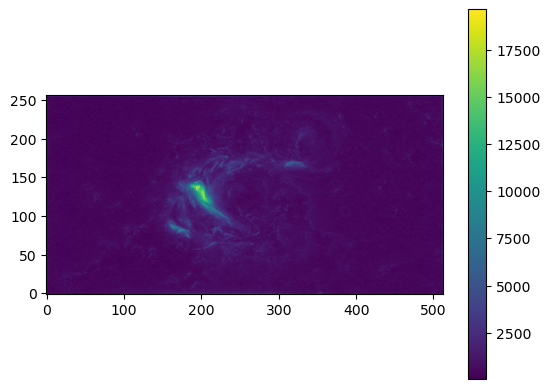

In [67]:
plt.imshow(j_norm.sum(-1).T, origin='lower')
plt.colorbar()

In [72]:
np.max(np.abs(j_norm))

8854.985382800276

In [73]:
np.mean(np.abs(j_norm))

2.8324672347999744

In [63]:
div_B = dBx_dx + dBy_dy + dBz_dz
div_B.shape

(513, 257, 257)

In [70]:
np.max(np.abs(div_B))

6313.548195051551

In [71]:
np.mean(np.abs(div_B))

0.4881240490240531

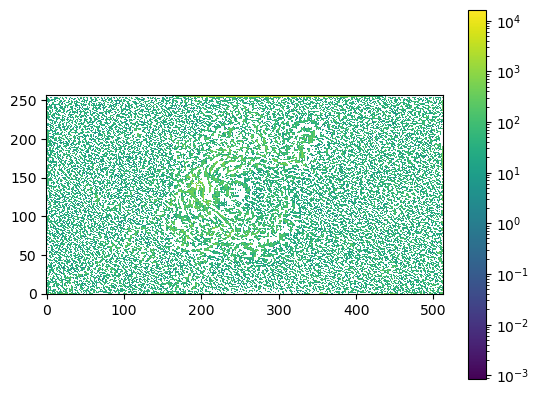

In [87]:
plt.imshow(div_B.sum(-1).T, origin='lower', norm=LogNorm())
plt.colorbar()

In [74]:
J.shape, B.shape

((513, 257, 257, 3), (513, 257, 257, 3))

In [75]:
JxB = np.cross(J, B, axis=-1)
JxB.shape

(513, 257, 257, 3)

In [76]:
jxb_norm = np.linalg.norm(JxB, axis=-1)
jxb_norm.shape

(513, 257, 257)

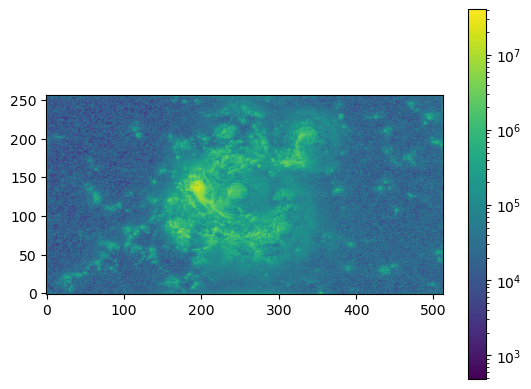

In [88]:
plt.imshow(jxb_norm.sum(-1).T, origin='lower', norm=LogNorm())
plt.colorbar()

In [78]:
np.max(np.abs(jxb_norm))

31892049.93048084

In [79]:
np.mean(np.abs(jxb_norm))

603.1695862555601

In [81]:
dBx_dx2 = np.gradient(dBx_dx, dx, axis=[0], edge_order=2)
dBx_dy2 = np.gradient(dBx_dy, dy, axis=[1], edge_order=2)
dBx_dz2 = np.gradient(dBx_dz, dz, axis=[2], edge_order=2)

dBy_dx2 = np.gradient(dBy_dx, dx, axis=[0], edge_order=2)
dBy_dy2 = np.gradient(dBy_dy, dy, axis=[1], edge_order=2)
dBy_dz2 = np.gradient(dBy_dz, dz, axis=[2], edge_order=2)

dBz_dx2 = np.gradient(dBz_dx, dx, axis=[0], edge_order=2)
dBz_dy2 = np.gradient(dBz_dy, dy, axis=[1], edge_order=2)
dBz_dz2 = np.gradient(dBz_dz, dz, axis=[2], edge_order=2)

In [82]:
laplacian_B = np.stack([dBx_dx2+dBx_dy2+dBx_dz2, dBy_dx2+dBy_dy2+dBy_dz2, dBz_dx2+dBz_dy2+dBz_dz2], axis=-1)
laplacian_B.shape

(513, 257, 257, 3)

In [83]:
laplacian_B_norm = np.linalg.norm(laplacian_B, axis=-1)
laplacian_B_norm.shape

(513, 257, 257)

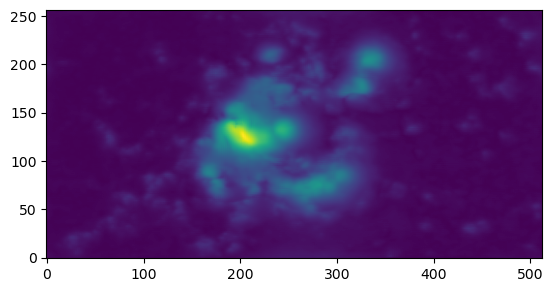

In [136]:
plt.imshow(b_norm[:, :, 3].T, origin='lower')

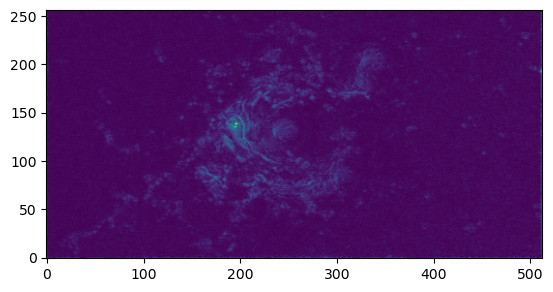

In [165]:
vmin = np.min(laplacian_B_norm)
vmax = np.max(laplacian_B_norm)
plt.imshow(laplacian_B_norm[:, :, 0].T, origin='lower', vmin=vmin, vmax=vmax)
# plt.scatter(196, 138, s=5, c='red', marker='o')

In [144]:
laplacian_B_norm.shape

(513, 257, 257)

In [143]:
np.unravel_index(np.argmax(np.abs(laplacian_B_norm), axis=None), laplacian_B_norm.shape)

(196, 138, 0)

Text(0, 0.5, 'y')

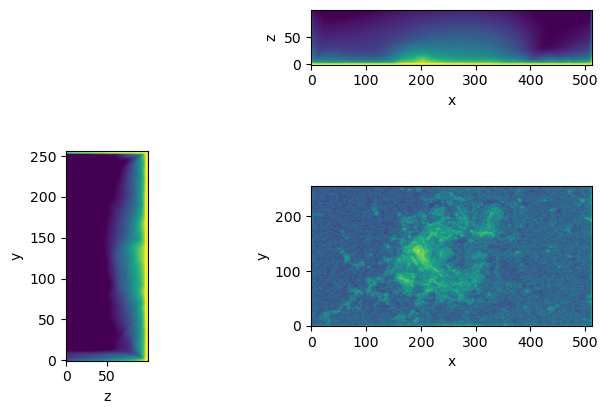

In [107]:
fig = plt.figure(layout='constrained')
axd = fig.subplot_mosaic(
    """
    .A
    BC
    """
)

vmin = np.min(laplacian_B_norm.sum(-1))
vmax = np.max(laplacian_B_norm.sum(-1))

axd['C'].imshow(laplacian_B_norm.sum(-1).T, origin='lower', norm=LogNorm(vmin=vmin, vmax=vmax))
axd['C'].set_xlabel('x')
axd['C'].set_ylabel('y')

axd['A'].imshow(laplacian_B_norm.sum(1)[:, :100].T, origin='lower', norm=LogNorm(vmin=vmin, vmax=vmax))
axd['A'].set_xlabel('x')
axd['A'].set_ylabel('z')

axd['B'].imshow(np.rot90(laplacian_B_norm.sum(0)[:, :100]).T, origin='lower', norm=LogNorm(vmin=vmin, vmax=vmax))
axd['B'].set_xlabel('z')
axd['B'].set_ylabel('y')

Text(0, 0.5, 'y')

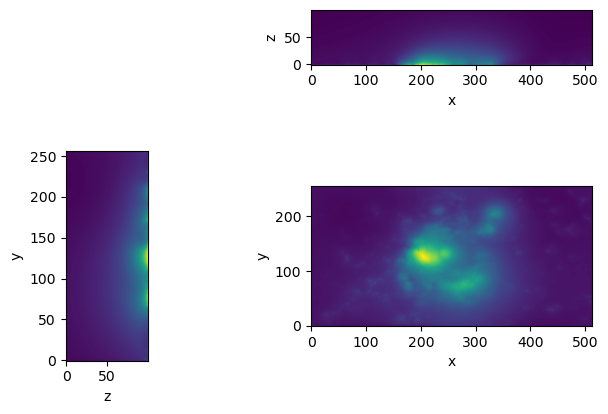

In [110]:
fig = plt.figure(layout='constrained')
axd = fig.subplot_mosaic(
    """
    .A
    BC
    """
)

vmin = np.min(b_norm.sum(-1))
vmax = np.max(b_norm.sum(-1))

axd['C'].imshow(b_norm.sum(-1).T, origin='lower')
axd['C'].set_xlabel('x')
axd['C'].set_ylabel('y')

axd['A'].imshow(b_norm.sum(1)[:, :100].T, origin='lower')
axd['A'].set_xlabel('x')
axd['A'].set_ylabel('z')

axd['B'].imshow(np.rot90(b_norm.sum(0)[:, :100]).T, origin='lower')
axd['B'].set_xlabel('z')
axd['B'].set_ylabel('y')

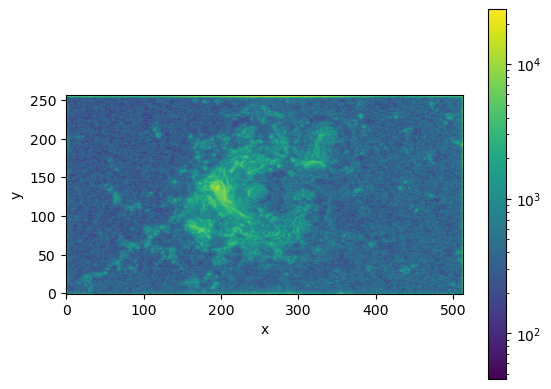

In [93]:
plt.imshow(laplacian_B_norm.sum(-1).T, origin='lower', norm=LogNorm())
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

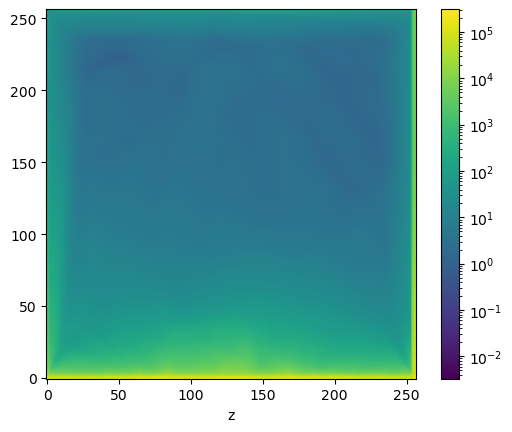

In [94]:
plt.imshow(laplacian_B_norm.sum(0).T, origin='lower', norm=LogNorm())
plt.xlabel('y')
plt.xlabel('z')
plt.colorbar()

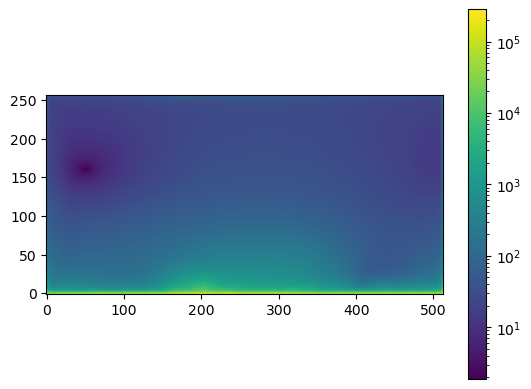

In [91]:
plt.imshow(laplacian_B_norm.sum(1).T, origin='lower', norm=LogNorm())
plt.colorbar()